<a href="https://colab.research.google.com/github/SuhasiniTatipalli/Sales-Prediction/blob/main/Project_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
## Additionl imports for modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading & exploring data
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Week 5/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Make a copy of the original df
df_sp = df.copy()
df_sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#check for duplicates
df_sp.duplicated().sum()

0

In [ ]:
#check for nulls
df_sp.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


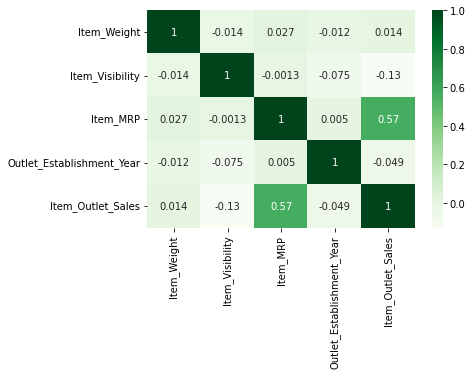

In [ ]:
#find the correlation coefficient using heatmap
corr = df_sp.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

In [ ]:
#drop columns which doesn't make any contribution in model building
df_sp.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Item_Fat_Content','Item_Visibility','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type'], inplace=True)

In [ ]:
df_sp.head()

,Item_Weight,Item_MRP,Outlet_Size,Item_Outlet_Sales
0,9.30,249.8092,Medium,3735.1380
1,5.92,48.2692,Medium,443.4228
2,17.50,141.6180,Medium,2097.2700
3,19.20,182.0950,NaN,732.3800
4,8.93,53.8614,High,994.7052


Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

In [ ]:
y = df_sp['Item_Outlet_Sales']
X = df_sp.drop(columns = 'Item_Outlet_Sales')


Perform a train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train.head()

,Item_Weight,Item_MRP,Outlet_Size
4776,16.350,256.4646,Medium
7510,15.250,179.7660,Medium
5828,12.350,157.2946,Medium
5327,7.975,82.3250,Small
4810,19.350,120.9098,NaN


Imputing missing values after the train test split using SimpleImputer.

In [ ]:
#a) Create column selectors for the numeric and categorical columns
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

In [ ]:
#declare most_frequent for ordinal column 
ordinal_imputer = SimpleImputer(strategy='most_frequent')
#use ordinal encoding here
ordinal = OrdinalEncoder(categories =[['Small','Medium','High']])
ordinal


OrdinalEncoder(categories=[['Small', 'Medium', 'High']])

In [ ]:
# Imputers
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()


Create a preprocessing object to prepare the dataset for Machine Learning

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
#ordinal pipeline here
ordinal_pipe = make_pipeline(ordinal_imputer,ordinal, scaler)
ordinal_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
number_tuple


(Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7f5bfa3b5550>)

In [ ]:
ordinal_tuple = (ordinal_pipe, cat_selector)
ordinal_tuple


(Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                 ('standardscaler', StandardScaler())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7f5bfa3b5510>)

In [ ]:
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, ordinal_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5bfa3b5550>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5bfa3b5510>)])

Modeling

Create a pipeline with preprocessor & model

1.Build a linear regression model to predict sales.

In [ ]:
## Make and fit a linear regression model
reg = LinearRegression()
reg_pipe = make_pipeline(preprocessor, reg)

reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5bfa3b5550>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5bfa3b5510>)])),
                ('linearregression', LinearRegression())])

In [47]:
#Make predictions using the testing data
predictions_test = reg_pipe.predict (X_test)
pd.DataFrame(predictions_test)
predictions_train = reg_pipe.predict (X_train)
pd.DataFrame(predictions_train)

,0
0,4035.797715
1,2841.305327
2,2496.913569
3,1064.523769
4,1913.995938
...,...
6387,2220.687318
6388,1216.097751
6389,3734.954258
6390,1865.593065


Measuring model performance - using functions from metrics

In [ ]:
#Evaluate the performance of your model based on r^2.
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)
print(f"Train R-Squared: { round( r2_score(y_train, train_pred), 3)}")
print(f"Test R-Squared: { round( r2_score(y_test, test_pred), 3)}")


Train R-Squared: 0.33
Test R-Squared: 0.327


In [ ]:
#Evaluate the performance of your model based on mse.
mse_train =  mean_squared_error(y_train, train_pred, squared=False)
mse_test = mean_squared_error(y_test, test_pred, squared=False)
print(f"Train MSE: { round(mse_train, 2)}")
print(f"Test MSE: { round( mse_test, 2)}")

Train MSE: 1407.98
Test MSE: 1362.19


In [ ]:
#Evaluate the performance of your model based on rmse.
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f"Train RMSE: { round(rmse_train, 2)}")
print(f"Train RMSE: { round(rmse_test, 2)}")

Train RMSE: 37.52
Train RMSE: 36.91


In [ ]:
#Create a function to calculate all the metrics instead of calculating individually
def evaluate_metrics(y_true, y_pred):
  """Takes true target and predicted target and prints MAE, MSE, RMSE and R2"""
  
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

2. Your second task is to build a regression tree model to predict sales.

#Build a simple regression tree model.

In [ ]:
# instantiate a regression tree model, fit & evaluate
dec_tree = DecisionTreeRegressor(random_state=42)
# put the model in a pipeline with the preprocessor
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# fit the model on the training data
dec_tree_pipe.fit(X_train, y_train)
# evaluate the model on both the training and the testing data.
print('Training')
evaluate_metrics(y_train, dec_tree_pipe.predict(X_train))
print('Testing')
evaluate_metrics(y_test, dec_tree_pipe.predict(X_test))

Training
scores: 
MAE: 22.95 
MSE: 29,760.69 
RMSE: 172.51 
R2: 0.99
Testing
scores: 
MAE: 1,189.09 
MSE: 2,818,128.61 
RMSE: 1,678.73 
R2: -0.02


the default decision tree had a much higher R^2 score on the training data than it did on the test data. This is an indication that the model is overfitting.

In [ ]:
## Get deth of tree
dec_tree.get_depth()

32

Finding the Optimal max_depth (hyperparameter tuning)

In [ ]:
# List of values to try for max_depth:
depths = list(range(1, 32)) # will try every value between 2 and 20
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
  # fit a new model with the depth
    dec = DecisionTreeRegressor(max_depth=depth, random_state=42)
    # put model in a pipeline
    dec_pipe = make_pipeline(preprocessor, dec)
    # fit the model
    dec_pipe.fit(X_train, y_train)
    train_score = dec_pipe.score(X_train, y_train)
    test_score = dec_pipe.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score
  

In [ ]:
scores

,Test Score,Train Score
1,0.229683,0.237797
2,0.306049,0.305669
3,0.322932,0.325911
4,0.336074,0.34458
5,0.394217,0.421456
6,0.459128,0.502524
7,0.456745,0.535169
8,0.451926,0.57248
9,0.423629,0.603499
10,0.376675,0.636977


In [ ]:
#sort the test scores to get the best optimized max_depth
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
6,0.459128,0.502524
7,0.456745,0.535169
8,0.451926,0.57248
9,0.423629,0.603499
5,0.394217,0.421456


In [ ]:
# Let's run the model with our optimized value for max_depth
optimal_depth = DecisionTreeRegressor(max_depth=6, random_state=42)
optimal_depth_pipe = make_pipeline(preprocessor, optimal_depth)
optimal_depth_pipe.fit(X_train,y_train)
train_6_score = optimal_depth_pipe.score(X_train,y_train)
test_6_score = optimal_depth_pipe.score(X_test,y_test)
print(train_6_score)
print(test_6_score)

0.5025242535744552
0.45912826149383623


In [53]:
print('Training')
evaluate_metrics(y_train, optimal_depth_pipe.predict(X_train))
print('Testing')
evaluate_metrics(y_test, optimal_depth_pipe.predict(X_test))

Training
scores: 
MAE: 888.40 
MSE: 1,472,257.44 
RMSE: 1,213.37 
R2: 0.50
Testing
scores: 
MAE: 890.20 
MSE: 1,492,252.84 
RMSE: 1,221.58 
R2: 0.46


Build a random forest regressor tree model.

In [ ]:
# Import random forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
## Make, fit, and evalaute model
rf = RandomForestRegressor(random_state = 42)
# put the model in a pipeline with the preprocessor
rf_tree_pipe = make_pipeline(preprocessor, rf)
# fit the model on the training data
rf_tree_pipe.fit(X_train, y_train)
# evaluate the model on both the training and the testing data.
print('Training')
evaluate_metrics(y_train, rf_tree_pipe.predict(X_train))
print('Testing')
evaluate_metrics(y_test, rf_tree_pipe.predict(X_test))



Training
scores: 
MAE: 372.46 
MSE: 280,974.61 
RMSE: 530.07 
R2: 0.91
Testing
scores: 
MAE: 952.56 
MSE: 1,799,215.38 
RMSE: 1,341.35 
R2: 0.35


In [ ]:
#find the depth of each tree in your random forest
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

36

 Tune the model by running the model with our optimized value for max_depth

In [ ]:
depths = range(1, max(est_depths))
scores1 = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model_pipe = make_pipeline(preprocessor, model)
   model_pipe.fit(X_train, y_train)
   scores1.loc[depth, 'Train Score'] = model_pipe.score(X_train, y_train)
   scores1.loc[depth, 'Test Score'] = model_pipe.score(X_test, y_test)

In [ ]:
scores1.head

<bound method NDFrame.head of    Test Score  Train Score
1    0.243405     0.253250
2    0.314772     0.317966
3    0.329421     0.333975
4    0.356206     0.365813
5    0.451131     0.473076
6    0.497322     0.532403
7    0.501642     0.561627
8    0.494945     0.594717
9    0.482804     0.632210
10   0.473806     0.674587
11   0.461992     0.715417
12   0.441005     0.753399
13   0.426656     0.789045
14   0.410792     0.819426
15   0.396242     0.839539
16   0.385285     0.860981
17   0.374705     0.874741
18   0.367491     0.881277
19   0.367303     0.889083
20   0.354547     0.895529
21    0.35893     0.898332
22   0.346678     0.901165
23   0.355652     0.903216
24   0.350531     0.903139
25   0.355985     0.903716
26   0.348743     0.904341
27   0.352946     0.904224
28   0.355183     0.905161
29   0.351769     0.904796
30   0.350073     0.904400
31   0.350214     0.904228
32   0.349274     0.905128
33    0.35452     0.903539
34   0.346486     0.904418
35   0.352848     0.90454

In [ ]:
sorted_scores1 = scores1.sort_values(by='Test Score', ascending=False)
sorted_scores1.head()

,Test Score,Train Score
7,0.501642,0.561627
6,0.497322,0.532403
8,0.494945,0.594717
9,0.482804,0.632210
10,0.473806,0.674587


In [ ]:
#Tuning n_estimators (# of decision trees)
# choose a couple of values for n_estimators to save time
n_ests = [10,15,20,25,30,35,40,45,50,55, 100, 150,155,160, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model1 = RandomForestRegressor(max_depth=7, n_estimators=n)
   model1_pipe = make_pipeline(preprocessor, model1)
   model1_pipe.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model1_pipe.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model1_pipe.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
10,0.497519,0.555238
15,0.491809,0.558438
20,0.495045,0.557034
25,0.497477,0.561377
30,0.500806,0.559287


In [ ]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
160,0.50217,0.562292
250,0.501399,0.563082
155,0.501027,0.560911
30,0.500806,0.559287
100,0.500072,0.561431


In [54]:
print('Training')
evaluate_metrics(y_train, model1_pipe.predict(X_train))
print('Testing')
evaluate_metrics(y_test, model1_pipe.predict(X_test))

Training
scores: 
MAE: 827.50 
MSE: 1,293,039.54 
RMSE: 1,137.12 
R2: 0.56
Testing
scores: 
MAE: 844.05 
MSE: 1,375,628.19 
RMSE: 1,172.87 
R2: 0.50
